In [3]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ggplay = pd.read_csv('D:/Ki1_Nam4/CoderSchool/Week4/google-play-store.csv')
ggplay.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
ggplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
ggplay.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
rating_mean=ggplay['Rating'].mean()
rating_mean

4.193338315362448

In [8]:
# fill mean in to NaN values of Rating column
ggplay['Rating']=ggplay['Rating'].fillna(4.2)

In [9]:
ggplay['Rating'].isna().sum()

0

In [10]:
# drop NaN of ggplay
ggplay=ggplay.dropna()

In [11]:
# test NaN values of df
ggplay.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
#change type of reviews from object to int64
ggplay["Reviews"] = ggplay["Reviews"].astype('int64')

In [13]:
# delete '+' & ',' of Installs column
#ggplay['Installs'] = ggplay['Installs'].replace("+","")
ggplay['Installs'] = [x.strip().replace('+', '') for x in ggplay['Installs']]
ggplay['Installs'] = [x.strip().replace(',', '') for x in ggplay['Installs']]


In [14]:
#change type of reviews from object to int64
ggplay["Installs"] = ggplay["Installs"].astype('int64')


In [15]:
ggplay["Installs"].max()

1000000000

### Step 3 - EDA

**The app with the highest number of installing**

In [16]:
# Sort TotalPay value from big to small, the first row is result 
Top10_install= ggplay.sort_values(by='Reviews', ascending=False).head(10)
Top10_install

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


In [17]:
ggplay['Installs'].max()

1000000000

## => 58 app are installed with 1 billion

In [18]:
ggplay['Content Rating'].nunique()

6

**Change string=>int of Content Rating to creat chart**

In [21]:
ggplay['Content Rating']=ggplay['Content Rating'].replace('Unrated', 0)
ggplay['Content Rating']=ggplay['Content Rating'].replace('Everyone 10+', 1)
ggplay['Content Rating']=ggplay['Content Rating'].replace('Mature 17+', 2)
ggplay['Content Rating']=ggplay['Content Rating'].replace('Teen', 3)
ggplay['Content Rating']=ggplay['Content Rating'].replace('Adults only 18+', 4)
ggplay['Content Rating']=ggplay['Content Rating'].replace('Everyone', 5)

In [22]:
ggplay['Content Rating'].unique()

array([5, 3, 1, 2, 4, 0], dtype=int64)

In [32]:
Top_Install=ggplay[ggplay['Installs']==ggplay['Installs'].max()]
Top_Install.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 152 to 9844
Data columns (total 13 columns):
App               58 non-null object
Category          58 non-null object
Rating            58 non-null float64
Reviews           58 non-null int64
Size              58 non-null object
Installs          58 non-null int64
Type              58 non-null object
Price             58 non-null object
Content Rating    58 non-null int64
Genres            58 non-null object
Last Updated      58 non-null object
Current Ver       58 non-null object
Android Ver       58 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 6.3+ KB


## What category that Top app installed belong?

In [63]:
#count categories of Top app installed
Top_category= Top_Install['Category'].value_counts(sort=False)
Top_category

SOCIAL                  8
COMMUNICATION          19
ENTERTAINMENT           1
FAMILY                  1
VIDEO_PLAYERS           3
GAME                    6
BOOKS_AND_REFERENCE     1
TRAVEL_AND_LOCAL        5
TOOLS                   2
PRODUCTIVITY            4
PHOTOGRAPHY             4
NEWS_AND_MAGAZINES      4
Name: Category, dtype: int64

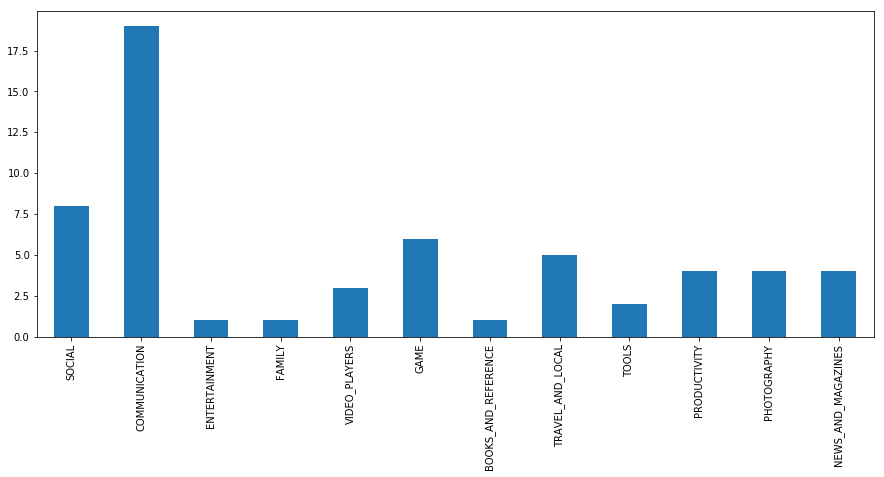

In [64]:
Top_category.plot(kind='bar',figsize=(15,6))

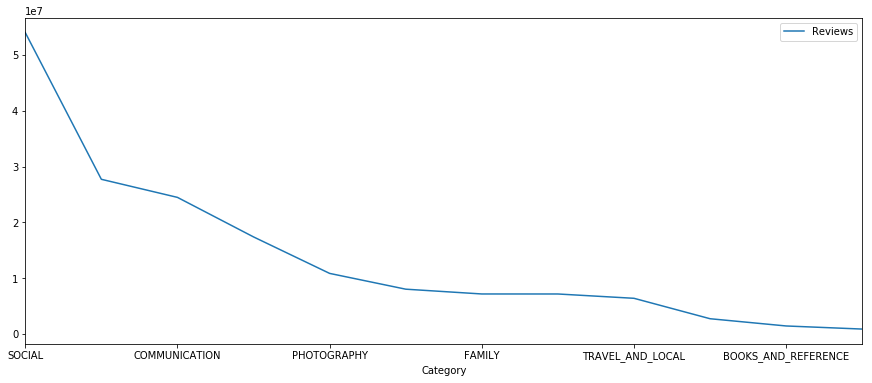

In [69]:
Top_Install_reviews= Top_Install.groupby(by=['Category'], as_index=False)['Reviews'].mean().sort_values(by=['Reviews'],ascending=False )
Top_Install_reviews.plot(x='Category',y='Reviews',figsizvbe=(15,6))

In [70]:
Top_Install_reviews

,Category,Reviews
8,SOCIAL,5.402350e+07
4,GAME,2.772199e+07
1,COMMUNICATION,2.448169e+07
11,VIDEO_PLAYERS,1.739508e+07
6,PHOTOGRAPHY,1.085596e+07
9,TOOLS,8.027558e+06
3,FAMILY,7.168735e+06
2,ENTERTAINMENT,7.165362e+06
10,TRAVEL_AND_LOCAL,6.392307e+06
7,PRODUCTIVITY,2.730634e+06


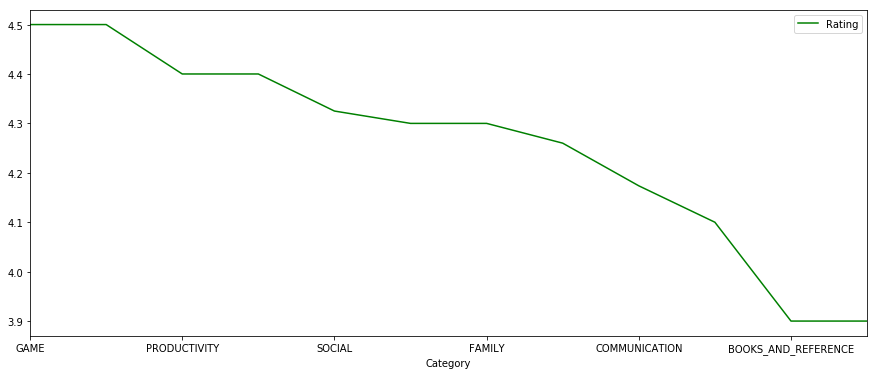

In [67]:
Top_Install_rating = Top_Install.groupby(by=['Category'], as_index=False)['Rating'].mean().sort_values(by=['Rating'],ascending=False )
Top_Install_rating.plot(x='Category',y='Rating',c='g',figsize=(15,6))

In [68]:
Top_Install_rating

,Category,Rating
4,GAME,4.500000
6,PHOTOGRAPHY,4.500000
7,PRODUCTIVITY,4.400000
9,TOOLS,4.400000
8,SOCIAL,4.325000
2,ENTERTAINMENT,4.300000
3,FAMILY,4.300000
10,TRAVEL_AND_LOCAL,4.260000
1,COMMUNICATION,4.173684
11,VIDEO_PLAYERS,4.100000


## Correlation between variables: Rating, Content rating and Installs

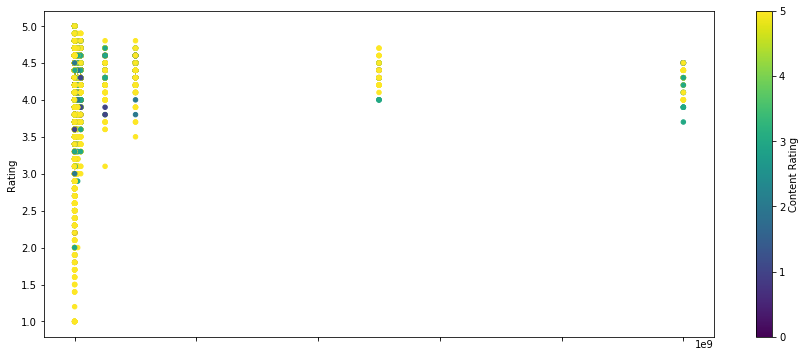

In [31]:
ax1 = ggplay.plot.scatter(y='Rating',x='Installs', c= 'Content Rating',colormap='viridis',figsize=(15, 6))
ax1

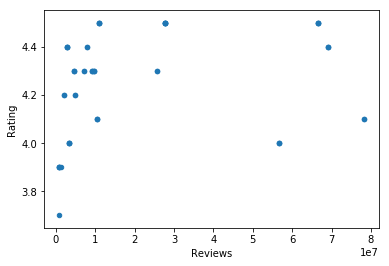

In [26]:
ax2= Top500m.plot(y='Rating',x='Reviews',kind='scatter')

**How many app of each category**

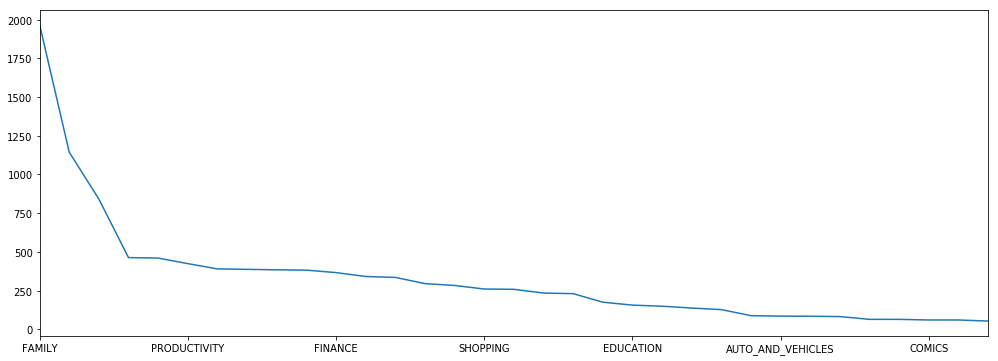

In [73]:
#count categories of ggpplay
ggpplay_cat= ggplay['Category'].value_counts(sort=True, ascending=False)
ggpplay_cat.plot(figsize=(17,6))

In [74]:
ggpplay_cat

FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64